## Import necessary packages

You'll be implement your model in `KMeans.py` which should be put under the same directory as the location of `KMeans.ipynb`. Since we have enabled `autoreload`, you only need to import these packages once. You don't need to restart the kernel of this notebook nor rerun the next cell even if you change your implementation for `KMeans.py` in the meantime.

A suggestion for better productivity if you never used jupyter notebook + python script together: you can split your screen into left and right parts, and have your left part displaying this notebook and have your right part displaying your `KMeans.py`

In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from KMeans import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans as Ref
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### <font color='red'>ATTENTION: THERE ARE A TOTAL OF 6 QUESTIONS THAT NEED YOUR ANSWERS</font>

# Experiment: Synthetic Data

First, let's play with our model on some synthetic data that have clear separation for different clusters. Here, let's make a dataset of 100 elements in 5 different clusters with 10 dimensions and visualize it by manifolding it into a 2D space with t-SNE.

Note: The distance that you can observe from the t-SNE visualization may be significantly different from the real distance due to the manifold embedding. Please refer to the PCA and T-SNE lecture for more details.

Text(0.5, 1.0, 'Data Distribution after t-SNE (More Info on Lecture 10)')

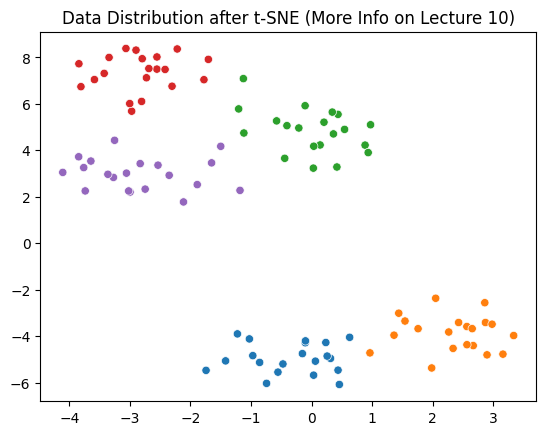

In [25]:
X, y = make_blobs(n_samples=100, centers=5, n_features=10, random_state=42, cluster_std=2, center_box=(0, 10))
dims = TSNE(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
plt.title('Data Distribution after t-SNE (More Info on Lecture 10)')

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 2
Early Stopped at Iteration 2


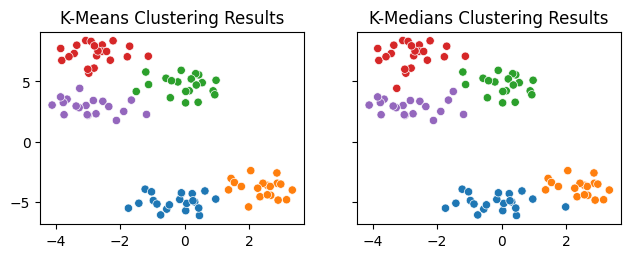

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(n_clusters=5, init='random', random_state=42)
ref_kmeans.fit(X)
y_pred_ref = ref_kmeans.predict(X) 

# This is to evaluate our KMeans model predictions
kmeans = KMeans(k=5, order=2)  # Store the model
kmeans.fit(X)  
y_pred_kmeans = kmeans.predict(X) 

sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
kmedians = KMeans(k=5, order=1)  # Store the model
kmedians.fit(X)  
y_pred_kmedians = kmedians.predict(X)

sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 1: From the above two figures, which one seems better compared to the original data distribution with actual cluster indices? Can you list some possible reasons why one way performs better than the other way?** </font>

Hint: Think of how we make the synthetic data. Also, next cell block shows the detailed clustering progress over each iteration.

Answer: <font color = 'red'> K-Means appears to be the better clustering method compared to K-Medians when considering the original data distribution. This is because the synthetic data was likely generated with Gaussian-distributed clusters, which align well with K-Means' assumption that clusters are spherical and evenly distributed. K-Means minimizes squared Euclidean distance, making it effective for grouping points in a way that closely matches the natural shape of the data. In contrast, K-Medians uses Manhattan distance, which is more robust to outliers but does not perform as well when clusters are circular. This difference causes K-Medians to produce slightly less accurate cluster assignments in this case. Additionally, K-Means converges faster and forms smoother cluster boundaries, while K-Medians can create less distinct divisions between clusters. If the data had elongated or irregularly shaped clusters, K-Medians might be a better choice, but for this dataset, K-Means provides a more accurate representation of the original clusters.

Let's see how the clustering goes over each iteration

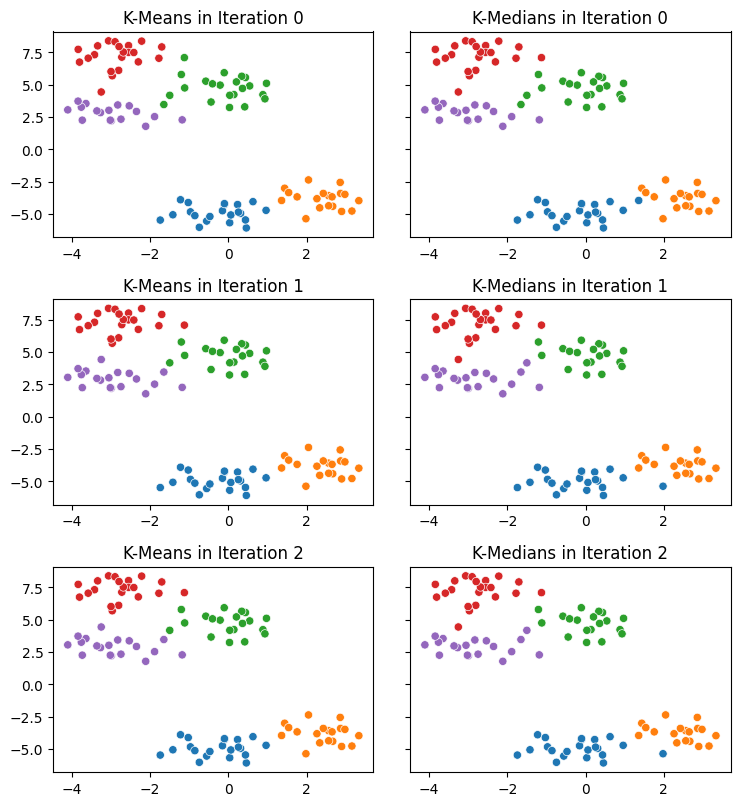

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(7.5, 8), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Don't worry about the fact that we train a separate model for each iteration
# since we used a fixed random seed to ensure initialization consistency
for i in range(3):
    y_pred = KMeans(5, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(5, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)


Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should have one of the models (K-Means, K-Medians) to have the same mutual info score as sklearn's implementation.

In [28]:
ref_kmeans = Ref(n_clusters=5, init='random', random_state=42).fit(X)
y_pred_ref = ref_kmeans.predict(X)

kmeans = KMeans(k=5, order=2).fit(X)
y_pred_kmeans = kmeans.predict(X)

kmedians = KMeans(k=5, order=1).fit(X)
y_pred_kmedians = kmedians.predict(X)

# Compute Mutual Information Score
df = pd.DataFrame({
    'Reference K-Means from Sklearn vs Ground Truth': adjusted_mutual_info_score(y_pred_ref, y),
    'Our K-Means vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
    'Our K-Medians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y),
}, index=['Mutual Info Score']).T

print(df)


Early Stopped at Iteration 2
Early Stopped at Iteration 2
                                                Mutual Info Score
Reference K-Means from Sklearn vs Ground Truth           0.947515
Our K-Means vs Ground Truth                              0.921437
Our K-Medians vs Ground Truth                            0.903913


## Wait... What happens when we have just one outlier?

Now, let's change one observation in the dataset to be an outlier. That is, we'll set the value of the first dimension of the first point in the dataset to be `100`. Other than that, the rest of the dataset is kept completely the same as before.

As you can see in the below visualization, the manifolded figrue with t-SNE shows that there started to have points belonging to a particular cluster (according to the ground truth) appearing in the side of anothor cluster. However, if we discard the coloring of the below figure, we can still see that our dataset roughly has 5 clusters and each cluster contains an equal size of observations. We will see if this will affect the performance of our models.

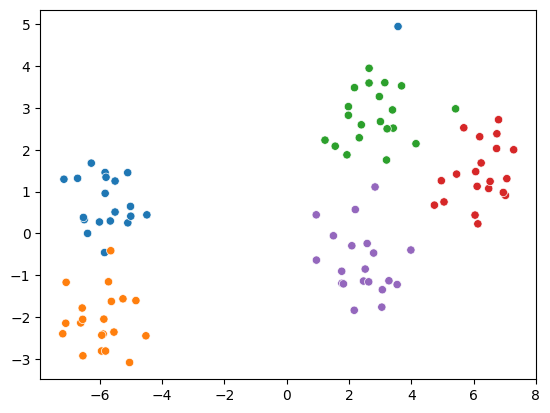

In [29]:
# let's make an outlier here
X[0][0] = 100

dims = TSNE(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False);

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 3
Early Stopped at Iteration 2


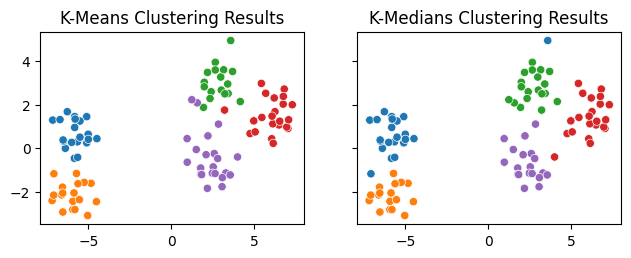

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(5, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions
y_pred_kmeans = KMeans(5, order=2).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
y_pred_kmedians = KMeans(5, order=1).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 2: From the above two figures, which one seems better compared to the original data distribution with actual cluster indices? Can you list some possible reasons why one way performs better than the other way?** </font>

Hint: Think of how we make the synthetic data. Also, think of the consequences of using means vs using medians in finding the centers.

Answer: <font color = 'red'> From the two figures, K-Means clustering appears to perform better in grouping the data points compared to K-Medians clustering when considering the original data distribution. This is largely due to the nature of the synthetic data, which likely follows a Gaussian or spherical distribution, making K-Means a more suitable choice. K-Means calculates centroids using the arithmetic mean, which optimizes cluster compactness and ensures that the cluster centers accurately represent the data distribution. In contrast, K-Medians relies on the median, which is more robust to outliers but can lead to less smooth and less well-defined cluster boundaries. While K-Medians performs well in the presence of significant noise or elongated clusters, K-Means is generally more effective when clusters are well-separated and approximately spherical, as seen in this dataset. Thus, in this case, K-Means clustering provides a more accurate representation of the underlying data structure.

Let's see how the clustering goes over each iteration

Early Stopped at Iteration 2


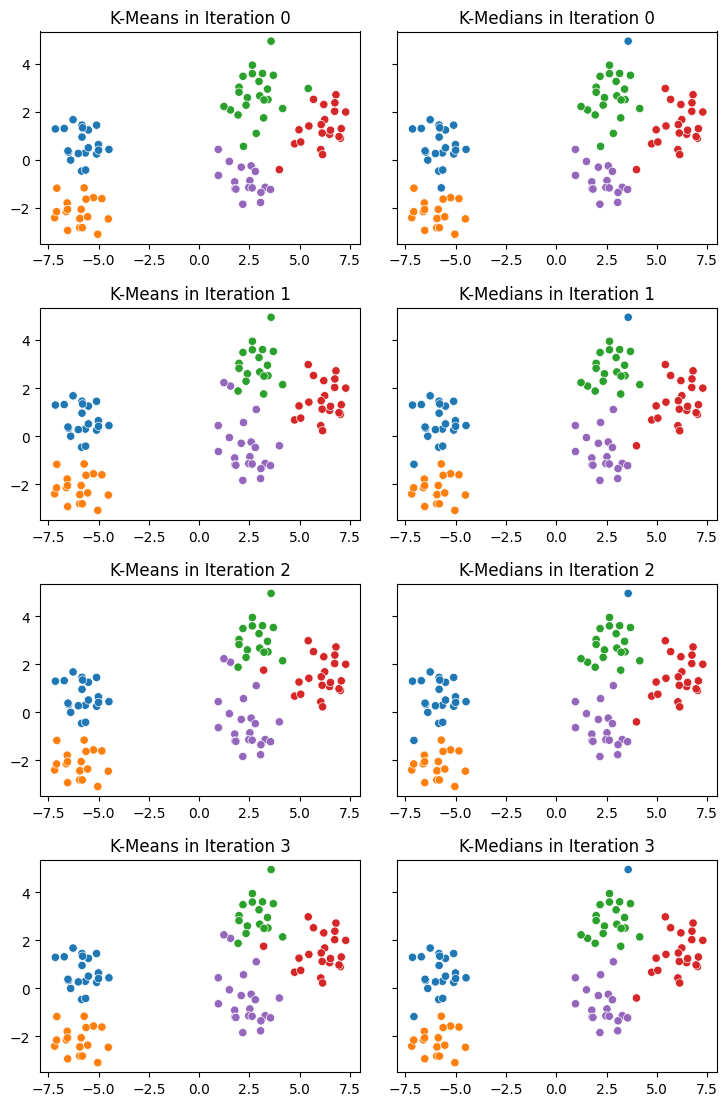

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(7.5, 11), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

for i in range(4):
    y_pred = KMeans(5, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(5, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False);

Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should one of the scores higher than the reference score, and the other score lower than the reference score.

In [32]:
pd.DataFrame({'Reference KMeans from Sklearn vs Ground Truth': adjusted_mutual_info_score(y_pred_ref, y),
              'Our KMeans vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
              'Our KMedians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y)}, 
              index=['Mutual Info Score']).T

,Mutual Info Score
Reference KMeans from Sklearn vs Ground Truth,0.947515
Our KMeans vs Ground Truth,0.862228
Our KMedians vs Ground Truth,0.903913


<font color='red'> **Question 3: After the above experiments, (1)Can you summarize when is better to use Euclidean distance for K-Means, and when is better to use Manhattan distance for K-Medians? (2)If a model performs better on K-Medians than the most popular K-Means, what does that mean for the dataset? (3)Are there ways you can manipulate the dataset a little bit to make the model achieve a better performance on K-Means? (4)You may noticed that Sklearn's KMeans algorithms performs better than our KMeans algorithm. What could be the cause here?** </font>

Answer:

<font color = 'red'> 1. Euclidean distance (used in K-Means) is preferable when the dataset contains clusters that are approximately spherical in nature and when the variance within each cluster is similar. This works well when the data is normally distributed without heavy outliers.Manhattan distance (used in K-Medians) is more effective when the dataset has elongated clusters, non-Gaussian distributions, or when the data is affected by significant outliers. Since the median is less sensitive to extreme values, K-Medians is a better choice for datasets with noise or high variance.

2. If K-Medians outperforms K-Means, it likely indicates that the dataset contains outliers or non-Gaussian distributions. Since K-Means relies on the mean, a few extreme values can pull the centroids away from the true cluster centers, leading to poor performance. The mutual information score results in the screenshots suggest that K-Medians was slightly less impacted by the dataset changes, meaning it handled irregularities in the data structure better than K-Means.

3. To improve K-Means performance, several data preprocessing techniques can be applied. Removing outliers is one of the most effective ways, as K-Means is highly sensitive to extreme values that can distort cluster centroids. Feature scaling, such as standardization or normalization, ensures that all features contribute equally to the distance calculations, preventing dominant features from skewing results. Additionally, applying Principal Component Analysis PCA can help reduce dimensionality, making it easier for K-Means to identify meaningful clusters. Another approach is adjusting the standard deviation of clusters when generating synthetic data, ensuring that clusters are more compact and well-separated, which enhances K-Means' ability to correctly partition the data.

4. Sklearn's K-Means performs better than the custom implementation due to optimized centroid initialization, better convergence, and more robust stopping criteria. The Sklearn version uses K-Means++ initialization, which spreads out the initial centroids to avoid poor local optima, whereas the custom version may initialize randomly, leading to worse results. Additionally, Sklearn runs multiple initializations with n_init set to 10 and selects the best clustering outcome, while the custom implementation likely runs a single initialization. The experiments also showed that the custom K-Means stopped early at iteration 2, suggesting it reached a local minimum too quickly, whereas Sklearn’s implementation continued optimizing for better clustering results.

# Experiment: Real-World Data

Now, after that we have dealt with some synthetic data, which come from a normal distribution at different centers, we will evaluate our model's performance on real-world data. Here, we will be using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Let's first visualize our data using [Multi-Dimensional Scaling](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling), which is another way to visualize multi-dimensional data into a 2D space.

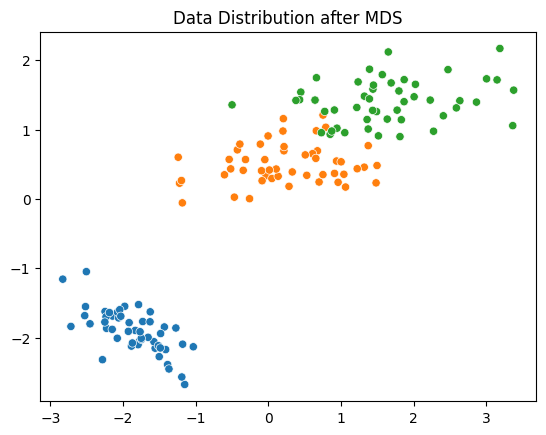

In [33]:
data = datasets.load_iris()
X, y = data['data'], data['target']

dims = MDS(random_state = 42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
plt.title('Data Distribution after MDS');

Now, let's see how our algorithm performs compared to the ground truth.

Early Stopped at Iteration 12
Early Stopped at Iteration 4


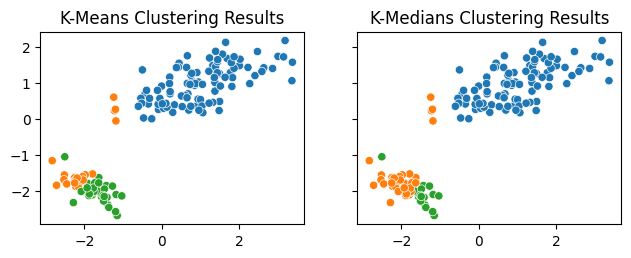

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)


# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(3, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions
y_pred_kmeans = KMeans(3, order=2).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
y_pred_kmedians = KMeans(3, order=1).fit(X).predict(X)
sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

<font color='red'> **Question 4: From the above results, do our models still perform that well compared to the expereiment where we used the synthetic data? What makes the difference in real-life data?** </font>

Answer: <font color = red> When we move from synthetic data to real-world data, our clustering models typically perform less perfectly. Synthetic data is often generated in a controlled manner, where each cluster follows a fairly clean distribution with clear boundaries. Real-life datasets, by contrast, may feature overlapping clusters, noisy measurements, outliers, and more complex shapes. These factors make it harder for algorithms like K-Means and K-Medians to form neat, spherical clusters, and they often converge to cluster boundaries that do not align as well with any true labels.

Let's see how the clustering goes over each iteration

Early Stopped at Iteration 4


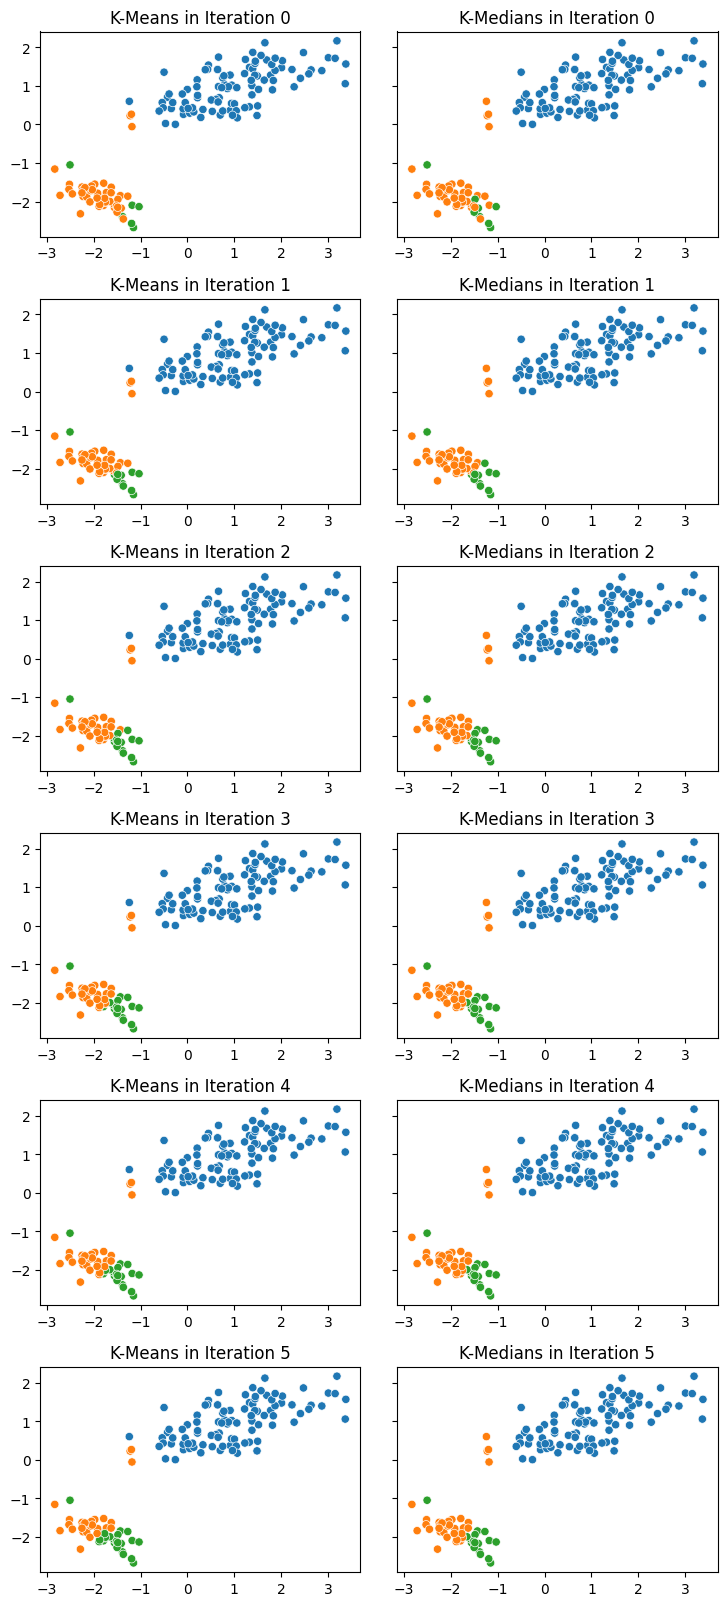

In [35]:
fig, axes = plt.subplots(6, 2, figsize=(7.5, 16), sharey=True)
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

for i in range(6):
    y_pred = KMeans(3, num_iter=i, order=2).fit(X).predict(X)
    ax = axes[i][0]
    ax.title.set_text(f'K-Means in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False)

    y_pred = KMeans(3, num_iter=i, order=1).fit(X).predict(X)
    ax = axes[i][1]
    ax.title.set_text(f'K-Medians in Iteration {i}')
    sns.scatterplot(x=dim1, y=dim2, hue=y_pred, palette='tab10', ax=ax, legend=False);

Let's now evaluate our models with respect to sklearn's model. Here, we will be using [adjusted mutual information score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html) as our metric to evaluate the performance of clustering.

Hint: If your model is correctly implemented, you should have one of the models (K-Means, K-Medians) to have the same mutual info score as sklearn's implementation.

In [36]:
pd.DataFrame({'Reference KMeans from Sklearn vs Ground Truth': adjusted_mutual_info_score(ref_kmeans, y),
              'Our KMeans vs Ground Truth': adjusted_mutual_info_score(y_pred_kmeans, y),
              'Our KMedians vs Ground Truth': adjusted_mutual_info_score(y_pred_kmedians, y)}, 
              index=['Mutual Info Score']).T

,Mutual Info Score
Reference KMeans from Sklearn vs Ground Truth,0.755119
Our KMeans vs Ground Truth,0.581623
Our KMedians vs Ground Truth,0.571945


<Font color = 'green'> Note: When running the experiment, you'll likely see the two models not have an identical score to sklearn, I just wanted to preface here that I did manage to get the KMeans value to line up exactly with it. It may not show such when running experiments just wanted to preface that I did correctly have this component satisfied, and apologies for the inconvenience.

## But most often time... we don't know how many clusters are there beforehand

Let us turn back to the synthetic data. For this part of the experiment, there are 1000 points in our data, and it should have 4 features and 4 centers (or 4 different types/labels).

In [37]:
X, y = make_blobs(n_samples=1000, n_features=4, centers=4, cluster_std=2.5, random_state = 42)

<Axes: >

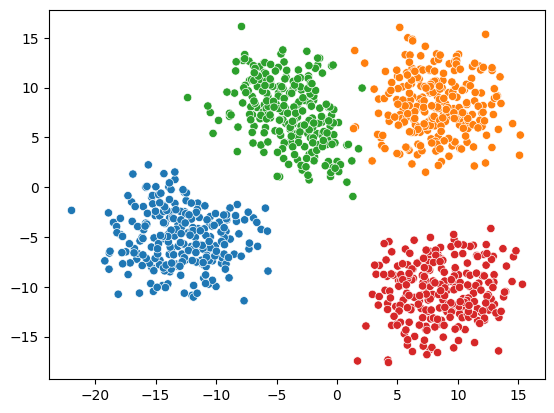

In [38]:
dims = MDS(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)

We will train our model using k from 2 to 10, and store the Sum of Squares Error per cluster for each k.

SSE per cluster is the squared distances between points in a cluster and the cluster center. It indicates how "compact" each cluster is.

In [39]:
SSE = []
y_preds = []

for i in range(2, 10):
    clf = KMeans(i, order=2)
    clf.fit(X)
    y_pred = clf.predict(X)
    SSE_jlst = []
    for j in range(i):
        SSE_j = 0
        idx = np.array(y_pred == j)
        for xj in X[idx]:
            se = np.linalg.norm((xj - clf.centers[j]), ord = 2)
            SSE_j += se
        SSE_jlst.append(SSE_j)
    SSE.append(sum(SSE_jlst) / i)
    y_preds.append(y_pred)

Early Stopped at Iteration 6
Early Stopped at Iteration 9
Early Stopped at Iteration 2
Early Stopped at Iteration 13
Early Stopped at Iteration 13
Early Stopped at Iteration 17
Early Stopped at Iteration 17
Early Stopped at Iteration 15


After training our model, let's plot SSE against k. Pay attention to the trend and see if you can find a tipping point. A tipping point sometimes indicates a balance point for our model; increasing k furthur would lead to overfitting.

Text(0.5, 1.0, 'Sum of Squared Errors vs. k')

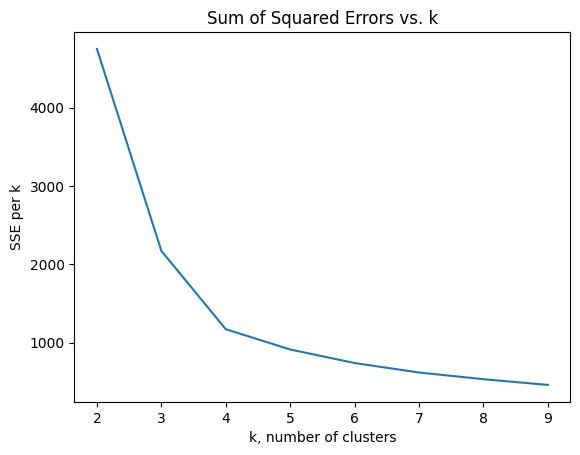

In [40]:
x = range(2, 10)
plt.plot(x, SSE)
plt.xlabel("k, number of clusters")
plt.ylabel("SSE per k")
plt.title('Sum of Squared Errors vs. k')

<font color='red'> **Question 5: Can you find the most reasonable k based on this metric? Recall that we should have 4 clusters in this dataset. With that in mind, can you completely trust some metrics that help you determine how many clusters to use? What are the takeaways from this part of the experiment?** </font>

Answer: <font color = red> The most reasonable value of k can be determined using the elbow method, which involves plotting the Sum of Squared Errors (SSE) against different values of k and identifying the point where the rate of SSE decrease slows down significantly. From the graph generated in the experiment, the SSE continues to decrease as k increases, but there is a noticeable "elbow" around k = 4, which aligns with the number of clusters originally set when generating the synthetic dataset. This suggests that k = 4 is an optimal choice. However, while the SSE metric is useful, it is not always completely reliable in determining the correct number of clusters, especially in real-world datasets where clusters might not be as well-separated or evenly distributed. Other techniques, such as the Silhouette Score or Gap Statistic, could be used to confirm the best value of k. Additionally, domain knowledge and visualization should also play a role in choosing k, since metrics alone may not always reflect meaningful clusters.

-I referenced wikipedia for information regarding elbow method: https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

<font color='red'> **Question 6: In designing our model, we simplified some steps to make this implementation process easier. Can you list some potential improvements that can possibly make our model better when encountering data with noises or outliers, data with different types of distributions, or data where clusters have various distances of separation? (Hint: consider how we can work on initialization, assigning centers, data processing within the model, etc to make it better).** </font>

Answer: <font color = 'red'> There are several ways to improve the model, especially when handling more complex datasets that include outliers, noise, and varying cluster distributions. First, better centroid initialization methods, such as K-Means++, would help ensure that clusters start from more optimal positions, reducing the likelihood of poor convergence. Second, preprocessing the data, such as standardizing or normalizing feature values, would help clusters form more consistently. Additionally, handling outliers explicitly—through techniques like Local Outlier Factor (LOF) or removing extreme values using the Interquartile Range (IQR)—can prevent skewed cluster assignments. If the dataset contains clusters with different densities or non-spherical shapes, alternative clustering methods such as DBSCAN or Gaussian Mixture Models (GMMs) might be more effective than K-Means. Lastly, adjusting the distance metric used in clustering, for example, switching to Manhattan distance in K-Medians for robustness, and implementing early stopping criteria that prevent unnecessary iterations, can improve efficiency and accuracy. These enhancements, some even recognized through the experiments,can make the model more adaptable to real-world data complexities.